### Imports

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matricesRalas import *

PRINT = False

### Datos del Grafo

In [2]:
def fillMatrixEJ3():
    mat = MatrizRala(11,11)
    #Wij= 1 pj cita a pi A->F: paper A ha citado al paper F.
    #Wfa = 1 W50
    # CITAS A-0 {C:2,D:3,E:4} 
    mat[0,2] = 1
    mat[0,3] = 1
    mat[0,4] = 1

    # CITAS B-1 {A:0}
    mat[1,0] = 1

    # CITAS C-2

    # CITAS D-3

    # CITAS E-4 {K:10}
    mat[4,10] = 1

    # CITAS F-5 {A:0,G:6}
    mat[5,0] = 1
    mat[5,6] = 1

    # CITAS G-6 {A:0,H:7,I:8}
    mat[6,0] = 1
    mat[6,7] = 1
    mat[6,8] = 1

    # CITAS H-7 {I:8}
    mat[7,8] = 1

    # CITAS I-8 {F:5}
    mat[8,5] = 1

    # CITAS J-9 {I:8}
    mat[9,8] = 1
 

    # CITAS K-10

    return mat

### W y D

Crear las matrices $\mathbf{W}$ y $\mathbf{D}$ para la  utilizando la clas MatrizRala

In [3]:
W = fillMatrixEJ3()

D = W.getD()

if(PRINT):
    print(W,D)

Para expresar la ecuación como un sistema lineal $Ax = b$, primero necesitamos reorganizarla. Dado que $p^*$ es el vector de probabilidades que queremos encontrar, podemos escribir la ecuación como:

$p^* = \frac{1 - d}{N} \mathbf{1} + d \mathbf{W}\mathbf{D}p^*$

donde:
- $\mathbf{1}$ es un vector de unos de tamaño $Nx1$.
- $\mathbf{W}$ es la matriz que indica que paper cito al otro.
- $\mathbf{D}$ es la matriz diagonal que contiene la probabilidad dada que un paper sea citado en algun paper dado.
- $d$ probabilidad aleatoria de continuar leyendo alguno de los trabajos citados 
- $N$ es la cantidad de papers

Ahora, podemos reorganizar esta ecuación para obtener:

$p^* - d \mathbf{W}\mathbf{D}p^* = \frac{1 - d}{N} \mathbf{1}$

$p^* \left(\mathbf{I} - d \mathbf{W}\mathbf{D}\right) = \frac{1 - d}{N} \mathbf{1}$


Ahora, podemos expresar esto como un sistema lineal $Ax = b$, donde:
- $A = I - d\mathbf{W}\mathbf{D}$, siendo $I$ la matriz identidad.
- $x = p^*$.
- $b = \frac{1 - d}{N} \mathbf{1}$.

Esta es la forma en que podemos expresar la ecuación como un sistema lineal. Ahora, podemos utilizar métodos numéricos para resolver este sistema y encontrar el vector de probabilidades $p^*$.


Si el sistema converge, encontraremos un vector de probabilidades p∗ con matrices ralas. Expresar la ecuacion como un sistema lineal (Ax = b) y resolver para p∗ utilizando d = 0, 85

In [4]:
# PARAMETROS
d = 0.85
N = W.shape[0]
I = MatrizRala.One(N)

# A, b, 1
A = I -  d * W @ D 
vector_1 = MatrizRala.getVectorOne(N)
b = MatrizRala.getVectorOne(N) * ((1-d)/N)


# Metodo gauss
gaussJordan_sol = GaussJordan(A,b)

# Metodo Matriz Inversa
invA = A.inversa()
inversa_sol = invA @ b

if(PRINT):
    print("Solucion Gauss Jordan:")
    print(gaussJordan_sol)

    # print("Solucion Matriz Inversa:")
    # print(inversa_sol)

    # print("Diferencias")
    # print(gaussJordan_sol - inversa_sol)


Comparar el resultado obtenido con el metodo iterativo utilizando una distribucion equiprobable para la probabilidad inicial. Para realizar la comparaci´on, graficar la diferencia absoluta entre $p_{t}$ y $p^*$ para valores de t hasta ver que converge.

### Metodo Iterativo

$p_{t+1} = \frac{1 - d}{N} \mathbf{1} + d \mathbf{W}\mathbf{D}p_{t}$

In [12]:
#calculo utilizando metodo iterativo 

# Vector de probabilidades inicial con distribución equiprobable
p = MatrizRala.getVectorOne(W.shape[0]) * (1/W.shape[0])
    
vector_unos = MatrizRala.getVectorOne(W.shape[0])
    
# Método iterativo
TOLERANCIA = 0.000001
MAX_ITER = 100
diferenciasT = []
diferenciasSol = []

# Calculos Previos
dWD = d * W @ D
constante_term_1 = (1 - d) / N
termino_1 = constante_term_1 * vector_unos

tiempo = 0

for t in range(MAX_ITER):
    
    dWDP_t = dWD @ p
    next_p = termino_1 + dWDP_t
    
    # Calcular la diferencia absoluta entre p y p*
    deltaT = MatrizRala.diffVectors(next_p,p)
    dif_vectSol = MatrizRala.diffVectors(next_p,gaussJordan_sol)
    
    diferenciasT.append(deltaT)
    diferenciasSol.append(dif_vectSol)

    p = next_p
    
    if dif_vectSol < TOLERANCIA:
        print(f"Convergencia alcanzada en la iteración {t + 1}.")
        print("Resultado")
        print(p)
     
        break



    

Convergencia alcanzada en la iteración 46.
Resultado
MatrizRala([ 
    [ 0.058261363636363646  ]
    [ 0.030143750000000004  ]
    [ 0.01363636363636364  ]
    [ 0.01363636363636364  ]
    [ 0.02522727272727273  ]
    [ 0.11539534959533346  ]
    [ 0.10029592929966812  ]
    [ 0.04529108937325048  ]
    [ 0.11172247711643335  ]
    [ 0.04529108937325048  ]
    [ 0.01363636363636364  ]
])


### Graficos

In [9]:
def build_graph(rangex:int, y_axis:list,title:str = 'Convergencia del Método Iterativo'):
    """Toma un valor y una lista y genera un grafico

    Args:
        rangex (int): Canitdad de iteraciones
        y_axis (list): Un vector que lleva las diferencias entre p y pt
    """
    # Graficar la diferencia absoluta vs. t
    plt.figure()
    plt.plot(range(rangex), y_axis, label='Diferencia Absoluta')
    plt.xlabel('Iteraciones (t)')
    plt.ylabel('Diferencia Absoluta')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show() 
    


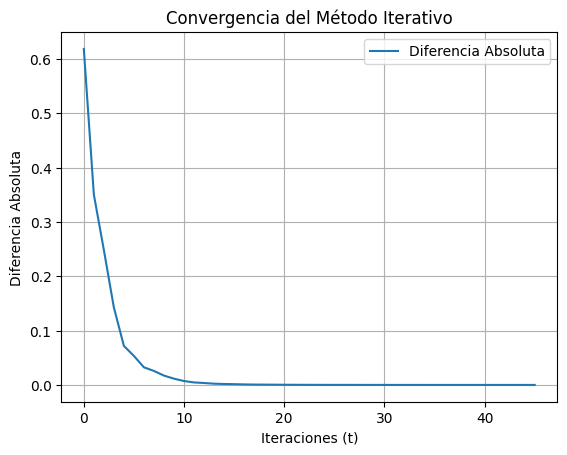

In [10]:
build_graph(len(diferenciasT),diferenciasT)

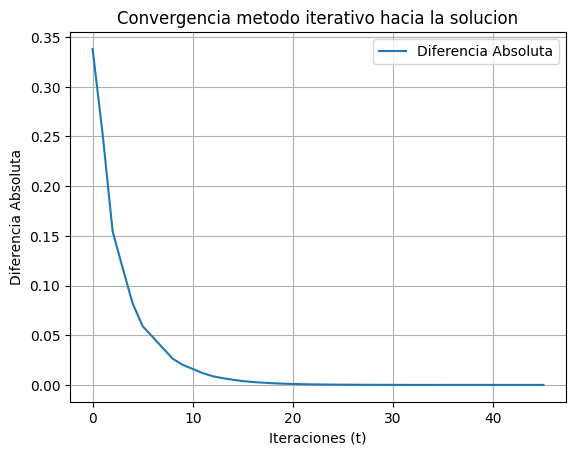

In [11]:
build_graph(len(diferenciasSol),diferenciasSol,"Convergencia metodo iterativo hacia la solucion")